In [1]:
# A little backgrown story
import pandas as pd # The prediction step provide correct image path
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
import scipy.stats as stats
from sklearn.preprocessing import MinMaxScaler
from yellowbrick.regressor import PredictionError




In [2]:
#reading the dataset
df = pd.read_csv("hosuing_price_dataset.csv")


In [3]:
# Exploratory data analysis
df.head

<bound method NDFrame.head of               Suburb           Address  Rooms Type      Price Method  \
0         Abbotsford      85 Turner St      2    h  1480000.0      S   
1         Abbotsford   25 Bloomburg St      2    h  1035000.0      S   
2         Abbotsford      5 Charles St      3    h  1465000.0     SP   
3         Abbotsford  40 Federation La      3    h   850000.0     PI   
4         Abbotsford       55a Park St      4    h  1600000.0     VB   
...              ...               ...    ...  ...        ...    ...   
13575  Wheelers Hill      12 Strada Cr      4    h  1245000.0      S   
13576   Williamstown     77 Merrett Dr      3    h  1031000.0     SP   
13577   Williamstown       83 Power St      3    h  1170000.0      S   
13578   Williamstown      96 Verdon St      4    h  2500000.0     PI   
13579     Yarraville        6 Agnes St      4    h  1285000.0     SP   

        SellerG        Date  Distance  Postcode  ...  Bathroom  Car  Landsize  \
0        Biggin   3/12/2

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [9]:
df.nunique()

Suburb             314
Address          13378
Rooms                9
Type                 3
Price             2204
Method               5
SellerG            268
Date                58
Distance           202
Postcode           198
Bedroom2            12
Bathroom             9
Car                 11
Landsize          1448
BuildingArea       602
YearBuilt          144
CouncilArea         33
Lattitude         6503
Longtitude        7063
Regionname           8
Propertycount      311
dtype: int64

In [10]:
df.shape

(13580, 21)

In [11]:
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [12]:
#data Cleaning

In [13]:
#only necessary columns
needed_columns = ['Suburb', 'Rooms', 'Type', 'Method', 'Price', 'SellerG',
       'Distance', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'CouncilArea', 'Regionname', 'Propertycount']

In [14]:
# assign oly neede columns
df = df[needed_columns]
df.shape

(13580, 15)

In [15]:
df.columns

Index(['Suburb', 'Rooms', 'Type', 'Method', 'Price', 'SellerG', 'Distance',
       'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea',
       'CouncilArea', 'Regionname', 'Propertycount'],
      dtype='object')

In [16]:
#checking for null values
df.isna().sum()
#randome sample inputation

Suburb              0
Rooms               0
Type                0
Method              0
Price               0
SellerG             0
Distance            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
CouncilArea      1369
Regionname          0
Propertycount       0
dtype: int64

In [17]:
#lets replace missing values with the rounded mean i.e 2.0
df['Car'] = df['Car'].fillna(round(df['Car'].mean()) * 1.0)
df['CouncilArea'] = df['CouncilArea'].fillna(df['CouncilArea'].value_counts().idxmax())
df['BuildingArea'] = df['BuildingArea'].fillna(df['BuildingArea'].mean())


<ipython-input-17-bed10e48003a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Car'] = df['Car'].fillna(round(df['Car'].mean()) * 1.0)
<ipython-input-17-bed10e48003a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CouncilArea'] = df['CouncilArea'].fillna(df['CouncilArea'].value_counts().idxmax())
<ipython-input-17-bed10e48003a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [18]:
df.isna().sum()

Suburb           0
Rooms            0
Type             0
Method           0
Price            0
SellerG          0
Distance         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
CouncilArea      0
Regionname       0
Propertycount    0
dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Rooms          13580 non-null  int64  
 2   Type           13580 non-null  object 
 3   Method         13580 non-null  object 
 4   Price          13580 non-null  float64
 5   SellerG        13580 non-null  object 
 6   Distance       13580 non-null  float64
 7   Bedroom2       13580 non-null  float64
 8   Bathroom       13580 non-null  float64
 9   Car            13580 non-null  float64
 10  Landsize       13580 non-null  float64
 11  BuildingArea   13580 non-null  float64
 12  CouncilArea    13580 non-null  object 
 13  Regionname     13580 non-null  object 
 14  Propertycount  13580 non-null  float64
dtypes: float64(8), int64(1), object(6)
memory usage: 1.6+ MB


In [20]:
#feature engineering

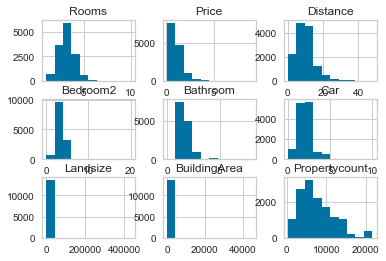

In [21]:

df.hist();

In [22]:

df.describe()

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,2.914728,1.534242,1.611856,558.416127,151.967650,7454.417378
std,0.955748,6.393107e+05,5.868725,0.965921,0.691712,0.960793,3990.669241,392.002962,4378.581772
min,1.000000,8.500000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,249.000000
25%,2.000000,6.500000e+05,6.100000,2.000000,1.000000,1.000000,177.000000,122.000000,4380.000000
50%,3.000000,9.030000e+05,9.200000,3.000000,1.000000,2.000000,440.000000,151.967650,6555.000000
75%,3.000000,1.330000e+06,13.000000,3.000000,2.000000,2.000000,651.000000,151.967650,10331.000000
max,10.000000,9.000000e+06,48.100000,20.000000,8.000000,10.000000,433014.000000,44515.000000,21650.000000


In [23]:
df_transform = ['Rooms', 'Price', 'Distance',
       'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea',
       'Propertycount']

In [24]:
#lets see the distribution
def distributionPlot():
    for i,column in enumerate(df_transform):
        plt.figure(figsize=(20, 30))
        plt.subplot(9, 2, i+1)
        plt.hist(data=df, x= column);
        # df[column] = np.log(df[column] +1)

        #QQ plot
        plt.subplot(9, 2, i+2)
        stats.probplot(df[column], dist="norm", plot=plt);
        plt.show()

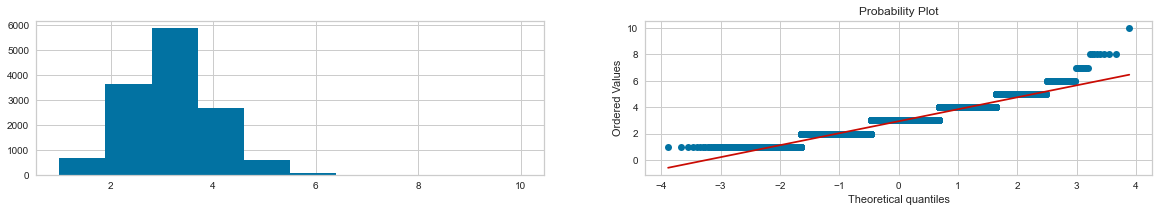

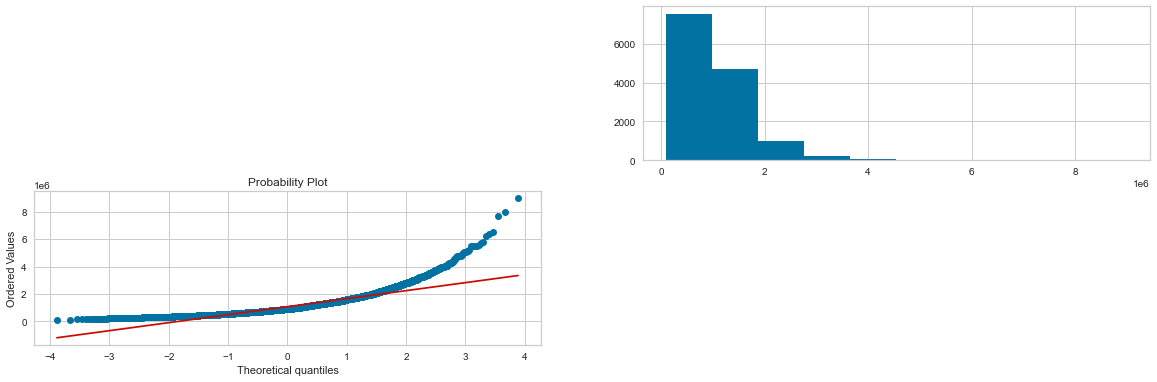

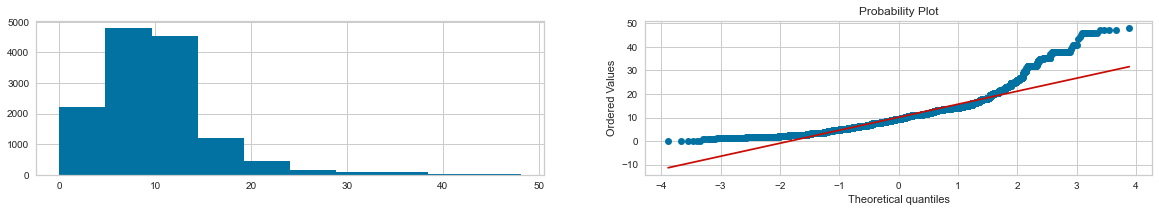

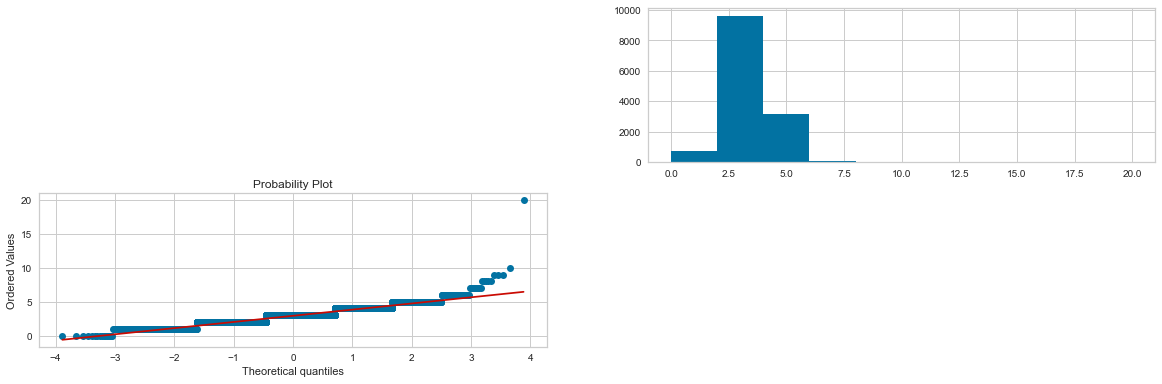

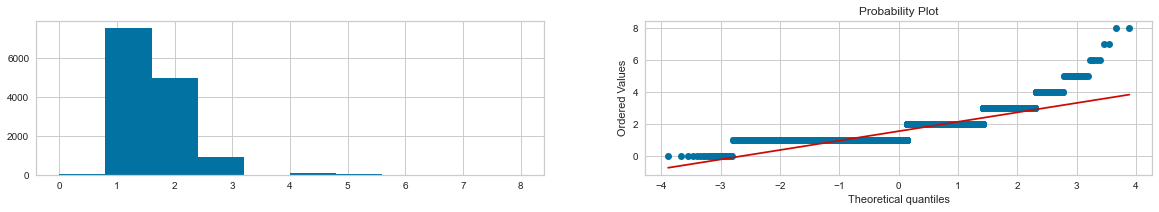

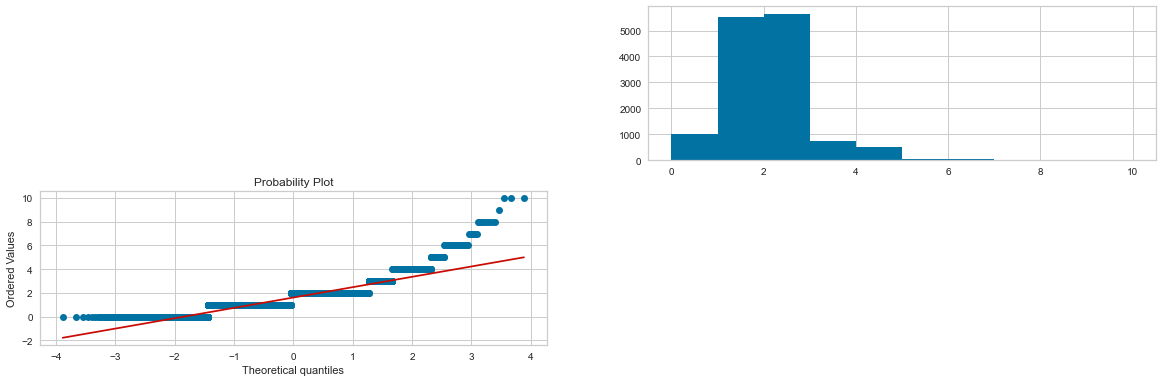

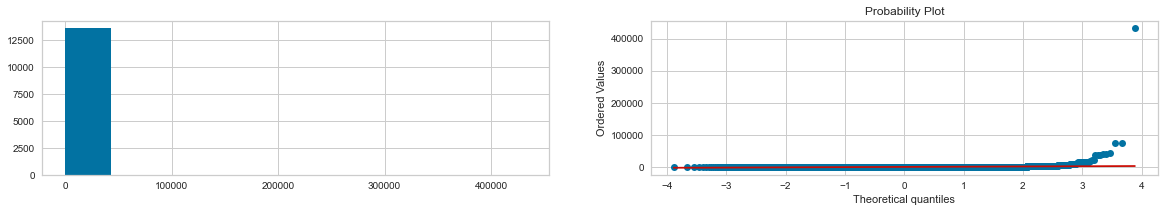

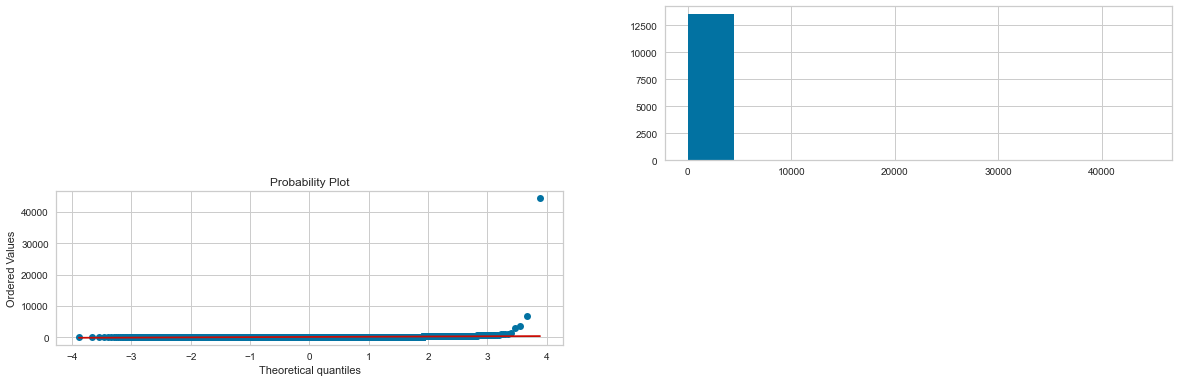

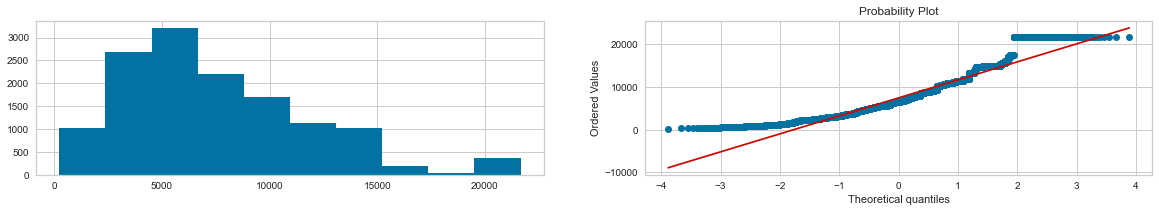

In [25]:
distributionPlot()

In [26]:
# #Lets perform log transformation to make the data more normally distributed
# for i,column in enumerate(df_transform):
#     plt.figure(figsize=(20, 30))
#     plt.subplot(9, 2, i+1)
#     plt.hist(data=df, x= column);
#     df[column] = np.log(df[column] +1)
#     plt.subplot(9, 2, i+2)
#     plt.hist(data=df, x= column);
#     plt.show()

In [27]:
#lets use pandas get_dummies for encoding
df = pd.get_dummies(df, drop_first=True)
df.head()

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Propertycount,Suburb_Aberfeldie,...,CouncilArea_Wyndham,CouncilArea_Yarra,CouncilArea_Yarra Ranges,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
0,2,1480000.0,2.5,2.0,1.0,1.0,202.0,151.96765,4019.0,0,...,0,1,0,0,1,0,0,0,0,0
1,2,1035000.0,2.5,2.0,1.0,0.0,156.0,79.00000,4019.0,0,...,0,1,0,0,1,0,0,0,0,0
2,3,1465000.0,2.5,3.0,2.0,0.0,134.0,150.00000,4019.0,0,...,0,1,0,0,1,0,0,0,0,0
3,3,850000.0,2.5,3.0,2.0,1.0,94.0,151.96765,4019.0,0,...,0,1,0,0,1,0,0,0,0,0
4,4,1600000.0,2.5,3.0,1.0,2.0,120.0,142.00000,4019.0,0,...,0,1,0,0,1,0,0,0,0,0


In [28]:
#lets separate x and y values
x = df.drop('Price', axis = 1)
y = df['Price']

In [29]:
# train test split
train_X, test_X, train_y, test_y = train_test_split(x, y, test_size= 0.3, random_state=42)

In [30]:
#scalling the features
scaler = MinMaxScaler()
train_X = scaler.fit_transform(train_X)
test_X = scaler.transform(test_X)

In [31]:
#model building


In [32]:
#linear regression
linear_regression = LinearRegression().fit(train_X, train_y)
print("score on test dataset: ", linear_regression.score(test_X, test_y))
print("score on train dataset: ", linear_regression.score(train_X, train_y))

score on test dataset:  -1.5825957402501728e+19
score on train dataset:  0.7085860680009809


In [ ]:
# model = Lasso()
# visualizer = PredictionError(model)

# visualizer.fit(train_X, train_y)  # Fit the training data to the visualizer
# visualizer.score(test_X, test_y)

In [35]:
#lasso regression
lasso_regression = Lasso(alpha= 50, max_iter=100, tol=0.1).fit(train_X, train_y)
print("score on test dataset: ", lasso_regression.score(test_X, test_y))
print("score on train dataset: ", lasso_regression.score(train_X, train_y))

score on test dataset:  0.6668837680626434
score on train dataset:  0.7018540282804069


In [37]:
#ridge regression
ridge_regression = Ridge(alpha= 50, max_iter=100, tol=0.1).fit(train_X, train_y)
print("score on test dataset: ", ridge_regression.score(test_X, test_y))
print("score on train dataset: ", ridge_regression.score(train_X, train_y))

score on test dataset:  0.6454295812212236
score on train dataset:  0.6569946961594627
